# Mega Plot

In [ ]:
# COMPTEL, EGRET @Kailash Raman upload to github (fix spike).
# continue fermi projections down in energy
# why INTEGRAL projections so poor?, also can we exend to bit higher energies?
# add stuff for inverse compton in the gap in draft
# Euclid
# remove Hubble
# Final state radiation in IC plot, make Dan hooper 1.5 o.o.m better

In [1]:
# COMPTEL, EGRET? CGRO (fix spike)
# continue fermi down in energy
# why INTEGRAL projections so poor, also can we exend to bit higher energies 
# add stuff for inverse compton in the gap
# Euclid

# what happened with eROSITA limit in Ciaran plot?
# why is MUSE so large (targets less strong, 6 orders of magnitude less exposure time to everything esle), I removed it

In [2]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import math
import time
import scipy
import matplotlib as mpl
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import pandas as pd
from scipy.stats import gaussian_kde
import seaborn as sns # v 0.11.0
import os
import h5py
import sys
import numpy as np


#master_folder = "/global/cfs/cdirs/m3166/benabou/COMSOL/COMSOL_2026/AxionLimits/"
master_folder = "/global/scratch/projects/pc_heptheory/jbenabou/AxionLimits/"

sys.path.append(master_folder)

from PlotFuncs import *
from PlotFuncs import MySquarePlot,AxionPhoton,MySaveFig,UpperFrequencyAxis_Simple,col_alpha,FigSetup,line_background,PlotBound

In [3]:
###### # Setup Plotting Defaults #
###################################### ##
# For more options see https://matplotlib.org/users/customizing.html


from cycler import cycler

# Commands for high detail plots (much larger in file size though)
#mpl.rcParams['agg.path.chunksize'] = 1000
#mpl.rcParams['savefig.epi'] = 1000

# Line styles
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['lines.antialiased'] = True
mpl.rcParams['lines.dashed_pattern'] = 2.8, 1.5
mpl.rcParams['lines.dashdot_pattern'] = 4.8, 1.5, 0.8, 1.5
mpl.rcParams['lines.dotted_pattern'] = 1.1, 1.1
mpl.rcParams['lines.scale_dashes'] = True

# Default colors
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler('color',['cornflowerblue','forestgreen','maroon','goldenrod','firebrick','mediumorchid'])


# Fonts
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'CMU Serif'
mpl.rcParams['font.sans-serif'] = 'CMU Sans Serif, DejaVu Sans, Bitstream Vera Sans, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif'

# Axes
mpl.rcParams['axes.linewidth'] = 1.0
mpl.rcParams['axes.labelsize'] = 25
mpl.rcParams['axes.labelpad'] = 9.0
                                                  
                                                  
# Tick marks - the essence of life
mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.minor.size'] = 2.5
mpl.rcParams['xtick.major.width'] = 1.0
mpl.rcParams['xtick.minor.width'] = 0.75
mpl.rcParams['xtick.major.pad'] = 8
mpl.rcParams['xtick.labelsize'] = 22
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.minor.size'] = 2.5
mpl.rcParams['ytick.major.width'] = 1.0
mpl.rcParams['ytick.minor.width'] = 0.75
mpl.rcParams['ytick.major.pad'] = 8
mpl.rcParams['ytick.labelsize'] = 22
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['ytick.minor.visible'] = True

# Legend
mpl.rcParams['legend.fontsize'] = 18
mpl.rcParams['legend.frameon'] = True
mpl.rcParams['legend.framealpha'] = 1.
#mpl.rcParams['legend.edgecolor'] = 'black'
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['legend.borderpad'] = 0.4 # border whitespace
mpl.rcParams['legend.labelspacing'] = 0.5 # the vertical space between the legend entries
mpl.rcParams['legend.handlelength'] = 1.5 # the length of the legend lines
mpl.rcParams['legend.handleheight'] = 0.7 # the height of the legend handle
mpl.rcParams['legend.handletextpad'] = 0.5 # the space between the legend line and legend text
mpl.rcParams['legend.borderaxespad'] = 0.5 # the border between the axes and legend edge
mpl.rcParams['legend.columnspacing'] = 2.0 # column separation


# Figure size
mpl.rcParams['figure.figsize'] = 16, 8

# Save details
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.pad_inches'] = 0.1

mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20

mpl.rcParams['text.usetex'] = True 

In [4]:
yr_to_s = 3.154e+7
m_to_inv_eV = 5.07e6
s_to_inveV = 1.519e15 
Hz_to_eV = 1/s_to_inveV 
cm_to_inv_eV = 1e-2 * m_to_inv_eV

In [5]:
def gayy_limit_2_tau_limit(gayy_GeV, mDM_eV):
    mDM_GeV = mDM_eV * 1e-9
    Gamma_GeV = (gayy_GeV**2 * mDM_GeV**3/(64*np.pi)) 
    tau_limit_s =  1/ (Gamma_GeV*1e9*s_to_inveV)
    return tau_limit_s

In [6]:
# "JWST", "Euclid", "Hubble", "eROSITA"

instrument_list =  ["HST_COS",
                    "HST_STIS",
                    #"Integral_Calore", 
                    "Integral_Fischer", 
                   # "Integral_Combined",
                   # "NuSTAR", 
                   # "XMMNewton", 
                   # "Chandra", 
                    "XRay_joint",
                   # "Fermi", "Fermi_ackermann", 
                    "Fermi_Combined"
                   ] 


color_dict = {"HST_COS": "violet",
              "HST_STIS": "violet",
              "Integral_Calore": "red", 
              "Integral_Fischer": "red",
              "Integral_Combined": "violet",
              "NuSTAR": "blue",
              "XMMNewton": "maroon",
              "Chandra": "k",
              "XRay_joint": "blue",
              "Fermi": "red",
              "Fermi_ackermann": "red",
              "Fermi_Combined": "green"
             }

# Projected lifetime constraints (2-photon)

projected_limits/HST_COS.npy
projected_limits/HST_STIS.npy
projected_limits/Integral_Fischer.npy
projected_limits/XRay_joint.npy
projected_limits/Fermi_Combined.npy


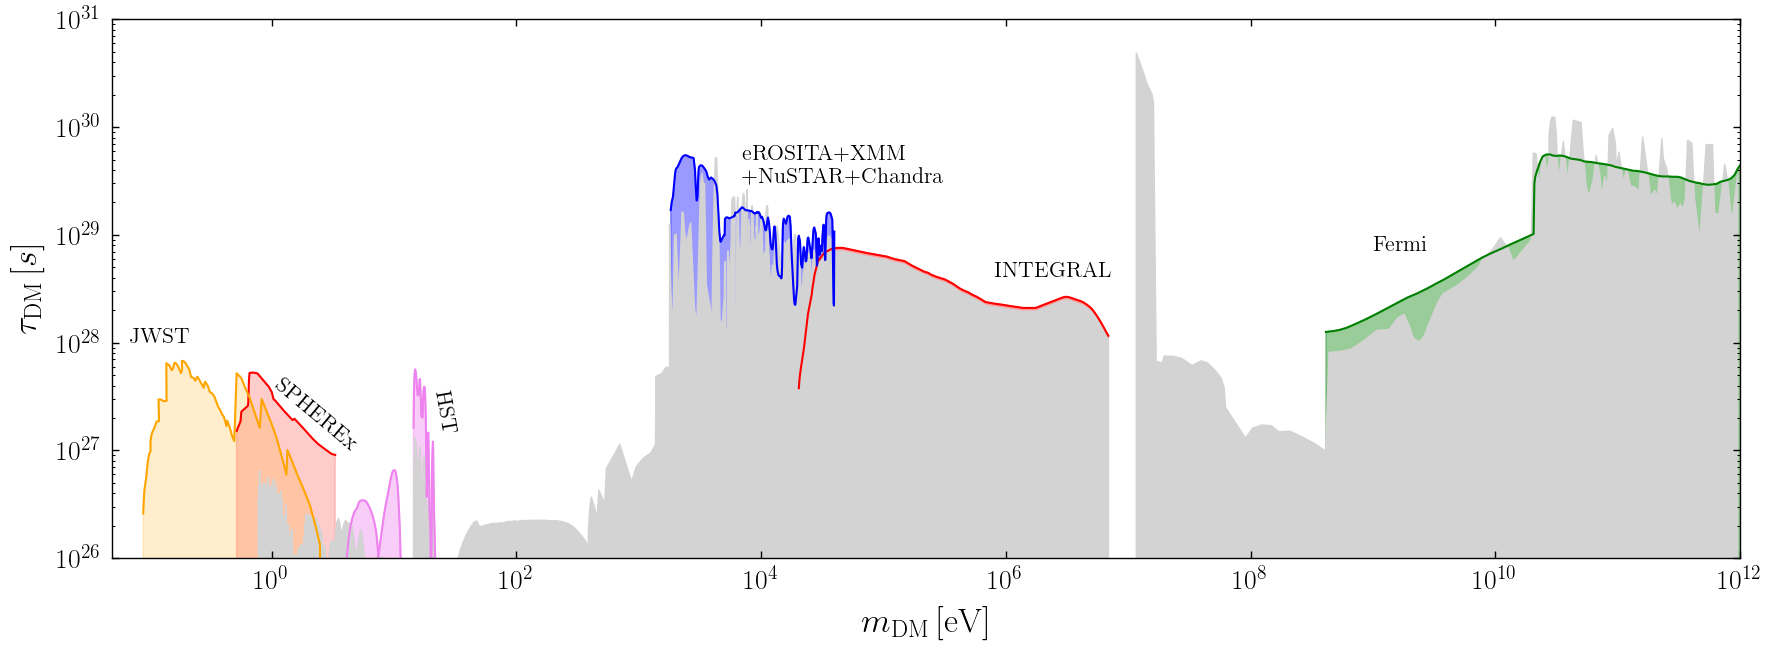

In [7]:
plt.figure(figsize=(21,7))

################################################################
################### EXISTING LIMITS CIARAN STUFF ################################
################################################################

edgecolor = 'k'


axion_photon_limits = [
 # "JWST_Pinetti",
    "DESI",
    "HST_dwarfs",
  #  "HST", # cosmic background anisotropy
   # "Telescopes_MUSE", # Ben thinks this limit is way too strong
    "JWST",
    "WINERED",
    "LeoT",
    "CMB_Anisotropies",
    "x_ion",
    "CosmicBackground",
   "GammaRayAttenuation",
    "GammaRayDecayCompilation", # !!! fix this , spike at low E is wrong
  "XRISM",
  "XMM-Newton",
  "NuSTAR",
  # "INTEGRAL",
   "XRAY",
  # "eROSITA", # this is actual limit, I plot expected limit below, but we think Ciaran has something wrong here on his github
]

for limit_name in axion_photon_limits:
    limit_dat = master_folder+"limit_data/AxionPhoton/"+limit_name+".txt"
    projected_limit_dat = np.loadtxt(limit_dat)
    mDM_arr_eV = projected_limit_dat[1:-1,0]
    # mDM_arr_GeV = mDM_arr_eV * 1e-9
    gayy_limit_GeV = projected_limit_dat[1:-1,1]
    # Gamma_GeV = (gayy_limit_GeV**2 * mDM_arr_GeV**3/(64*np.pi)) 
    # tau_limit_arr_s =  1/ (Gamma_GeV*1e9*s_to_inveV)
    
    tau_limit_arr_s = gayy_limit_2_tau_limit(gayy_limit_GeV, mDM_arr_eV)
    #plt.plot(mDM_arr_eV, tau_limit_arr_s, color="k")#,lw=0.1)
    plt.fill_between(mDM_arr_eV, tau_limit_arr_s, 1e-40, color="lightgray",alpha=1.0)
    # if limit_name=="eROSITA":
    #     plt.plot(mDM_arr_eV, tau_limit_arr_s, color="red",ls="-",lw=0.5)

INTEGRAL_limit =  np.load("existing_limits/Integral_Fischer.npy", allow_pickle=True).item()
plt.fill_between(INTEGRAL_limit['mDM_eV'], 1e-40,  INTEGRAL_limit["tau_limit_arr_s"], color="lightgray")


eROSITA_limit = np.loadtxt("existing_limits/2401.16747_limit_eROSITA.csv",delimiter=",")
mDM_eV = eROSITA_limit[:,0]*1e3
tau_s = 1/eROSITA_limit[:,1]
plt.fill_between(mDM_eV, 1e-40, tau_s, color="lightgray")

################################################################
# PROJECTED LIMITS

for instrument in instrument_list:#["NuSTAR"]:#
   # try:
    print("projected_limits/"+instrument+".npy")
    projected_limit_dat = np.load("projected_limits/"+instrument+".npy", allow_pickle=True).item() 
    plt.plot(projected_limit_dat["mDM_eV"], projected_limit_dat["tau_limit_arr_s"], color=color_dict[instrument])
    plt.fill_between(projected_limit_dat["mDM_eV"], 1e-40, projected_limit_dat["tau_limit_arr_s"], color=color_dict[instrument],alpha=0.4,zorder=-100000)

    # except:
    #     print("FAIL!")

###################
##### SPHEREx #####

SPHEREx_proj_MW_deepfield = np.loadtxt("projected_limits/SPHEREx_MW_Deepfield_2year_2412.12286_proj.txt",delimiter=",")
mDM_eV = SPHEREx_proj_MW_deepfield[:,0]
gayy_GeV = SPHEREx_proj_MW_deepfield[:,1]
tau_s_arr = gayy_limit_2_tau_limit(gayy_GeV, mDM_eV)

exp_fac = 260/(2*365)
tau_s_arr*=np.sqrt(exp_fac)

col="red"
plt.plot(mDM_eV, tau_s_arr,color=col)
plt.fill_between(mDM_eV, 1e-40, tau_s_arr, color=col,alpha=0.2,zorder=-100000)

###############
#### JWST #####

JWST_proj_MW_deepfield = np.loadtxt("projected_limits/Chris_JWST.txt",delimiter=",")
mDM_eV = JWST_proj_MW_deepfield[:,0]
gayy_GeV = JWST_proj_MW_deepfield[:,1]
tau_s_arr = gayy_limit_2_tau_limit(gayy_GeV, mDM_eV)

exp_fac = 1406/(10*365)
tau_s_arr*=np.sqrt(exp_fac)

col="orange"
plt.plot(mDM_eV, tau_s_arr,color=col)
plt.fill_between(mDM_eV, 1e-40, tau_s_arr, color=col,alpha=0.2,zorder=-100000)

###############
#### eROSITA #####

# eROSITA_expected = np.loadtxt("existing_limits/eROSITA_expected_limit_2401.16747.csv",delimiter=",")
# mDM_eV = eROSITA_expected[:,0]*1e3
# tau_s = 1/eROSITA_expected[:,1]
# plt.plot(mDM_eV, tau_s, color="red")

#####################
# LABELS


fs=16
plt.text(0.07,1e28,'JWST',fontsize=fs)
plt.text(1.0,1e27,'SPHEREx',fontsize=fs,rotation=-40)
#plt.text(0.3,7e27,'Euclid',fontsize=fs,rotation=0)
plt.text(20,1.5e27,'HST',fontsize=fs,rotation=-80)

#plt.text(1e3,1e30,'eROSITA',fontsize=fs,rotation=70)
#plt.text(1.5e4,8e27,'XMM',fontsize=13,rotation=-80)
#plt.text(1.5e4,2e29,'NuSTAR',fontsize=fs)
#plt.text(1.1e4,1e27,'Chandra',fontsize=fs,rotation=-90)

#plt.text(3e2,5e29,'eROSITA+XMM+NuSTAR+Chandra',fontsize=fs,rotation=0)
plt.text(7e3,5e29,'eROSITA+XMM',fontsize=fs,rotation=0)
plt.text(7e3,3e29,'+NuSTAR+Chandra',fontsize=fs,rotation=0)

plt.text(8e5,4e28,'INTEGRAL',fontsize=fs)
plt.text(1e9,7e28,'Fermi',fontsize=fs)

################################################################
plt.xlim([5e-2,1e12])
plt.ylim([1e26,1e31])

################################################################
#plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.ylabel(r"$\tau_\mathrm{DM} \, [s]$")
plt.xlabel(r"$m_\mathrm{DM}\, [\mathrm{eV}]$")
plt.savefig("plots/mega_plot_projected_constraint_tau_2gamma.pdf",bbox_inches="tight")

In [49]:
# MAKE PLACEHOLDER HUBBLE PROJECTION

HST_cosmic_optical_anis_limit = np.loadtxt(master_folder+"limit_data/AxionPhoton/HST.txt",delimiter=",")

tau_s_limit_placeholder = gayy_limit_2_tau_limit(HST_cosmic_optical_anis_limit[:,1], HST_cosmic_optical_anis_limit[:,0])*2


limit_dict = {"mDM_eV": HST_cosmic_optical_anis_limit[:,0],
              "tau_limit_arr_s": tau_s_limit_placeholder
             }

np.save("projected_limits/HST.npy", limit_dict)

ValueError: could not convert string to float: '3.44999999\t1.0'

In [ ]:
eROSITA_expected = np.loadtxt("existing_limits/eROSITA_expected_limit_2401.16747.csv",delimiter=",")
mDM_eV = eROSITA_expected[:,0]*1e3
tau_s = 1/eROSITA_expected[:,1]
plt.plot(mDM_eV, tau_s)



# Projected lifetime constraints (inverse compton)

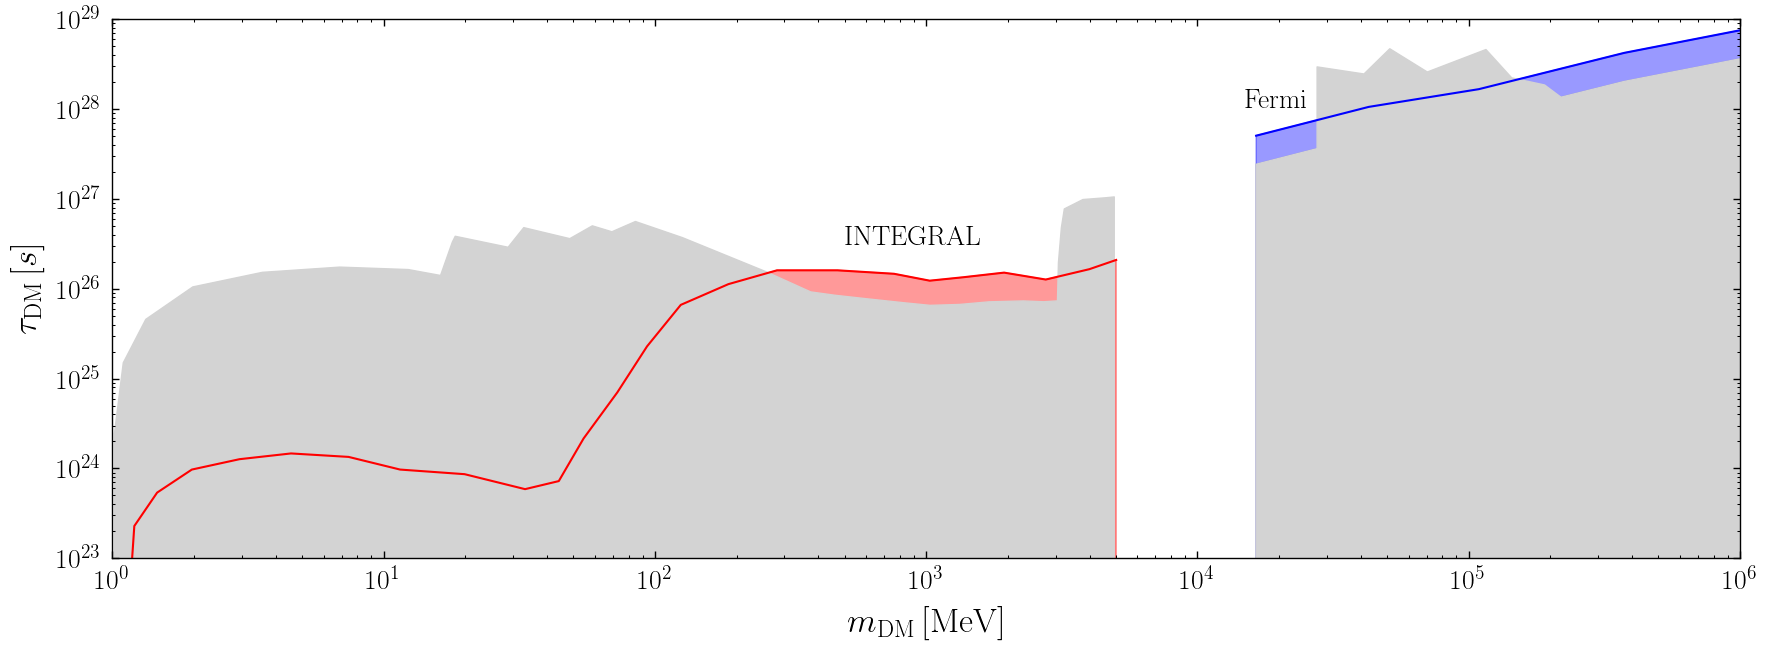

In [15]:
plt.figure(figsize=(21,7))


################################################################
# PROJECTED LIMITS

# for instrument in instrument_list:#["NuSTAR"]:#
#     try:
#         print("projected_limits/"+instrument+".npy")
#         projected_limit_dat = np.load("projected_limits/"+instrument+".npy", allow_pickle=True).item() 
#         plt.plot(projected_limit_dat["mDM_eV"], projected_limit_dat["tau_limit_arr_s"], color=color_dict[instrument])
#         plt.fill_between(projected_limit_dat["mDM_eV"], 1e-40, projected_limit_dat["tau_limit_arr_s"], color=color_dict[instrument],alpha=0.4,zorder=-100000)

#     except:
#         print("FAIL!")


################################################################
# INTEGRAL
##########
instrument_IC = "INTEGRAL"#, "NuSTAR", "XMM_Newton"] #"Suzaku",

#for instrument_IC in instruments_IC:
summary_IC_limits = np.loadtxt("existing_limits/IC_e+e-/"+instrument_IC+".csv",delimiter=",")
mDM_MeV = summary_IC_limits[:,0]
tau_s = summary_IC_limits[:,1]
rescale_fac =np.sqrt((6+16)/6) # !!! placeholder!
tau_s_rescaled = rescale_fac*tau_s
col = "red"
plt.plot(mDM_MeV, tau_s_rescaled,color=col)
plt.fill_between(mDM_MeV, 1e-40, tau_s_rescaled,color=col,alpha=0.4,zorder=-100000)


summary_IC_limits = np.loadtxt("existing_limits/IC_e+e-/Hooper_1811.05988_e+e-.csv",delimiter=",")
mDM_MeV = summary_IC_limits[:,0]*1e3
tau_s = summary_IC_limits[:,1]
plt.fill_between(mDM_MeV, 1e-40, tau_s,color="lightgray")

##########
# Fermi IRGB  analysi projections
##########

summary_IC_limits = np.loadtxt("existing_limits/IC_e+e-/Hooper_1811.05988_e+e-.csv",delimiter=",")
mDM_MeV = summary_IC_limits[:,0]*1e3
tau_s = summary_IC_limits[:,1]
tau_s_proj = tau_s*np.sqrt((12*(2026-2008))/50 ) # Dan used 50 months of data 
col="blue"
plt.plot(mDM_MeV, tau_s_proj,color=col)
plt.fill_between(mDM_MeV, 1e-40, tau_s_proj, alpha=0.4, color=col)


################################################################
# EXISTING LIMITS

###########
# IC e+e-
###########

summary_IC_limits = np.loadtxt("existing_limits/IC_e+e-/summary_2303.08854.csv",delimiter=",")
mDM_MeV = summary_IC_limits[:,0]
tau_s = summary_IC_limits[:,1]
plt.fill_between(mDM_MeV, 1e-40, tau_s,color="lightgray")


summary_IC_limits = np.loadtxt("existing_limits/IC_e+e-/Hooper_1811.05988_e+e-.csv",delimiter=",")
mDM_MeV = summary_IC_limits[:,0]*1e3
tau_s = summary_IC_limits[:,1]
plt.fill_between(mDM_MeV, 1e-40, tau_s,color="lightgray")

summary_IC_limits = np.loadtxt("existing_limits/AMS_e+e-_IC.csv",delimiter=",")
mDM_MeV = summary_IC_limits[:,0]*1e3
tau_s = summary_IC_limits[:,1]
plt.fill_between(mDM_MeV, 1e-40, tau_s,color="lightgray")



#####################
# LABELS


fs=20
plt.text(5e2,3e26,'INTEGRAL',fontsize=fs)
# plt.text(1.5e4,2e29,'NuSTAR',fontsize=fs)
# #plt.text(4e3,2e29,'XMM',fontsize=15,rotation=0)
plt.text(1.5e4,1e28,'Fermi',fontsize=fs)
# plt.text(1e3,1e30,'eROSITA',fontsize=fs,rotation=70)

################################################################
plt.xlim([1,1e6])
plt.ylim([1e23,1e29])

################################################################
#plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.ylabel(r"$\tau_\mathrm{DM} \, [s]$")
plt.xlabel(r"$m_\mathrm{DM}\, [\mathrm{MeV}]$")
plt.savefig("plots/mega_plot_projected_constraint_tau_IC.pdf",bbox_inches="tight")

# Projected axion-photon coupling constraints (2-photon)

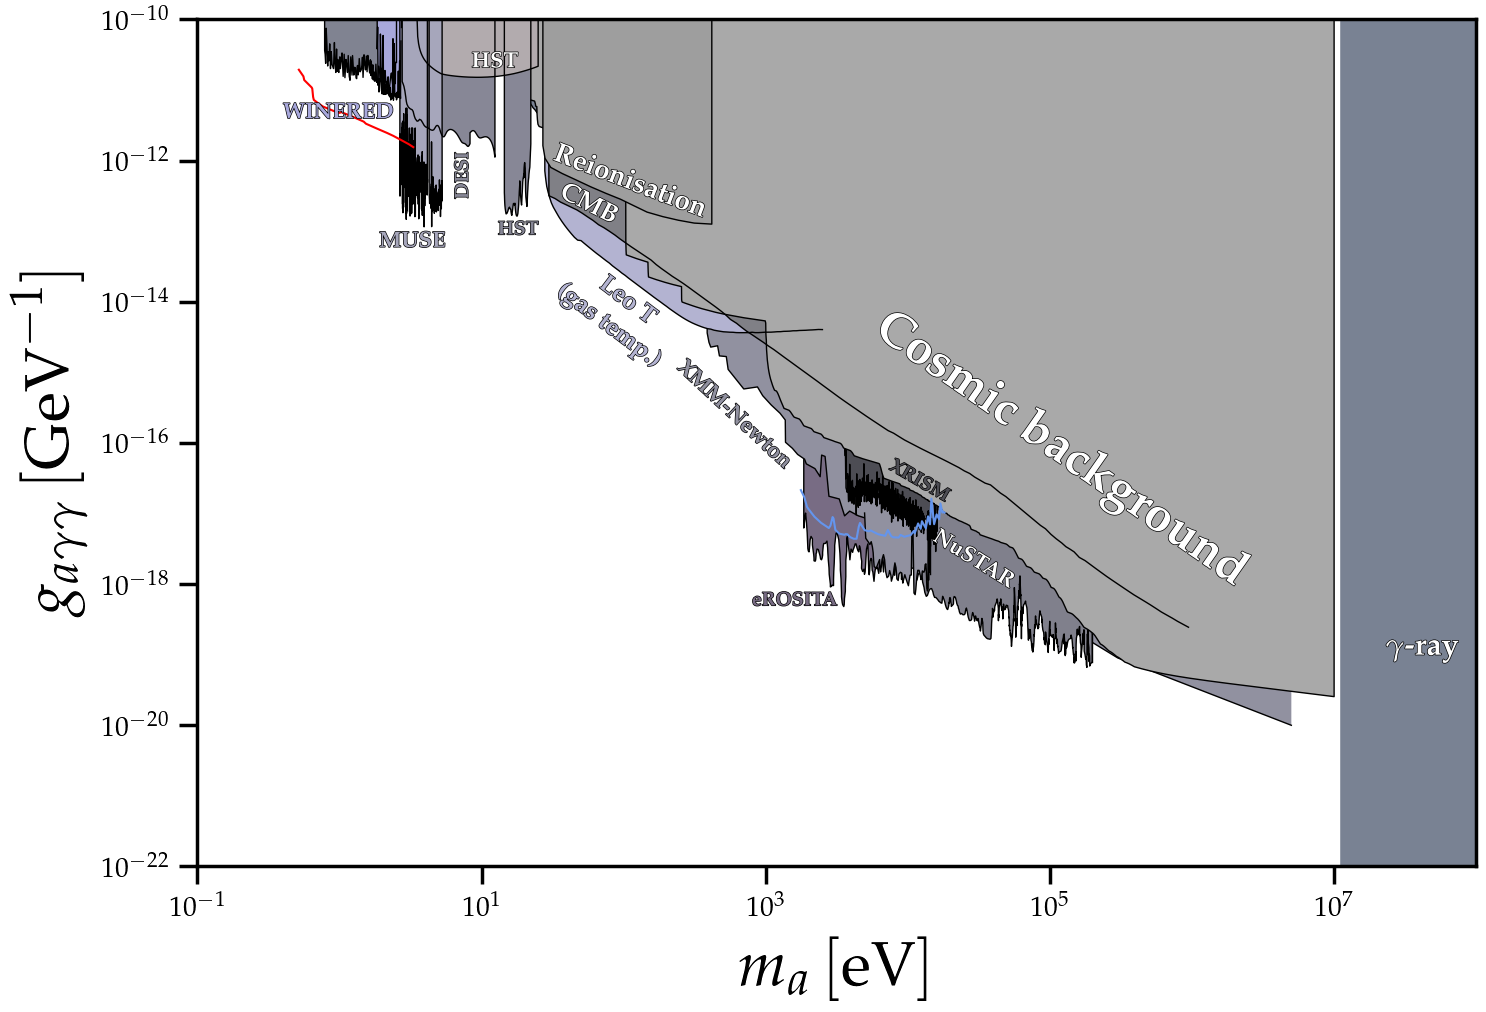

In [31]:
#fig, ax = plt.subplots(figsize=(10,8))

fig,ax = FigSetup(xlab=r'$m_a [\mathrm{eV}]$',ylab=r'$g_{a\gamma\gamma}\,[\mathrm{GeV}^{-1}]$',m_min=1e-1,m_max=1e8,g_min=1e-20,g_max=1e-7,xtick_rotation=0,mathpazo=True,figsize=(10,8))


################################################################
# PROJECTED LIMITS


# for instrument in instrument_list:
    
#     projected_limit_dat = np.load("projected_limits/"+instrument+".npy",allow_pickle=True).item()   
#     ma_arr = projected_limit_dat["mDM_eV"]
#     gayy_limit_arr =  np.sqrt( (64*np.pi) /(projected_limit_dat["tau_limit_arr_s"] * ma_arr**3) )
#     plt.plot(ma_arr, gayy_limit_arr, color="k")


# !!! replace this
SPHEREx_proj_MW_deepfield = np.loadtxt("projected_limits/SPHEREx_MW_Deepfield_2year_2412.12286_proj.txt",delimiter=",")
plt.plot(SPHEREx_proj_MW_deepfield[:,0], SPHEREx_proj_MW_deepfield[:,1],color="red")
################################################################
###################CIARAN STUFF ################################
################################################################

edgecolor = 'k'

#PlotBound(ax,master_folder+"limit_data/AxionPhoton/JWST_Pinetti.txt",facecolor=array([1,0.95,1.11])*0.7,zorder=0,lw=1,edgecolor=edgecolor,skip=3)
#ax.text(0.23,0.3e-12,r'{\bf JWST}',color=array([1,0.95,1.11])*0.7,fontsize=16,rotation=0,path_effects=line_background(1,'k'))


PlotBound(ax,master_folder+"limit_data/AxionPhoton/DESI.txt",facecolor=array([1,1,1.11])*0.53,zorder=0,lw=1,edgecolor=edgecolor)
PlotBound(ax,master_folder+"limit_data/AxionPhoton/HST_dwarfs.txt",facecolor=array([1,1,1.11])*0.53,zorder=0,lw=1,edgecolor=edgecolor)
PlotBound(ax,master_folder+"limit_data/AxionPhoton/HST.txt",facecolor=array([1.04,1,1.02])*0.67,zorder=0,lw=1,edgecolor=edgecolor)
PlotBound(ax,master_folder+"limit_data/AxionPhoton/Telescopes_MUSE.txt",facecolor=array([1,1,1.13])*0.65,zorder=0,lw=1,edgecolor=edgecolor)
PlotBound(ax,master_folder+"limit_data/AxionPhoton/JWST.txt",facecolor=array([1,1.03,1.14])*0.5,zorder=0,lw=1,edgecolor=edgecolor,skip=3)
PlotBound(ax,master_folder+"limit_data/AxionPhoton/WINERED.txt",facecolor=array([1,1,1.3])*0.66,zorder=0,lw=1,edgecolor=edgecolor,skip=200)
PlotBound(ax,master_folder+"limit_data/AxionPhoton/LeoT.txt",facecolor=array([1,1,1.17])*0.7,zorder=-1,lw=1,skip=1,edgecolor=edgecolor)
PlotBound(ax,master_folder+"limit_data/AxionPhoton/CMB_Anisotropies.txt",facecolor=array([1,1,1.05])*0.5,zorder=-1,lw=1,skip=1,edgecolor=edgecolor)
PlotBound(ax,master_folder+"limit_data/AxionPhoton/x_ion.txt",facecolor=array([1,1,1])*0.62,zorder=0,lw=1,skip=1,edgecolor=edgecolor)
PlotBound(ax,master_folder+"limit_data/AxionPhoton/CosmicBackground.txt",facecolor='darkgray',zorder=-1,lw=1,skip=1,edgecolor=edgecolor)
PlotBound(ax,master_folder+"limit_data/AxionPhoton/GammaRayAttenuation.txt",facecolor=array([0.95,1.02,1.15])*0.5,zorder=-2,lw=1,skip=1,edgecolor=edgecolor)
PlotBound(ax,master_folder+"limit_data/AxionPhoton/GammaRayDecayCompilation.txt",facecolor=array([0.95,1.02,1.15])*0.5,zorder=-10,lw=1,skip=1,edgecolor=edgecolor)


PlotBound(ax,master_folder+"limit_data/AxionPhoton/XRISM.txt",facecolor=array([1,1,1.1])*0.3,zorder=-2.9,lw=1,skip=4,edgecolor=edgecolor)
PlotBound(ax,master_folder+"limit_data/AxionPhoton/XMM-Newton.txt",facecolor=array([1,1,1.1])*0.57,zorder=-3,lw=1,skip=4,edgecolor=edgecolor)
PlotBound(ax,master_folder+"limit_data/AxionPhoton/NuSTAR.txt",facecolor=array([1,1,1.1])*0.5,zorder=-4,lw=1,skip=4,edgecolor=edgecolor)
#PlotBound(ax,master_folder+"limit_data/AxionPhoton/INTEGRAL.txt",facecolor=array([1,1,1.2])*0.55,zorder=-5,lw=1,skip=1,edgecolor=edgecolor)
PlotBound(ax,master_folder+"limit_data/AxionPhoton/XRAY.txt",facecolor=array([1,1,1.1])*0.57,zorder=-6,lw=1,skip=1,edgecolor=edgecolor)
PlotBound(ax,master_folder+"limit_data/AxionPhoton/eROSITA.txt",facecolor=array([1,0.9,1.1])*0.47,zorder=-7,lw=1,skip=1,edgecolor=edgecolor)


ax.text(13,0.9e-13,r'{\bf HST}',color=array([1,1,1.11])*0.53,fontsize=14,rotation=0,path_effects=line_background(1,'k'))
ax.text(1.9,0.6e-13,r'{\bf MUSE}',color=array([1,1,1.13])*0.65,fontsize=16,rotation=0,path_effects=line_background(1,'k'))
ax.text(6.4,0.34e-12,r'{\bf DESI}',color=array([1,1,1.11])*0.53,fontsize=14,rotation=90,path_effects=line_background(1,'k'))
ax.text(8.5,2.1e-11,r'{\bf HST}',color='w',fontsize=16,rotation=0,path_effects=line_background(1,'k'))
ax.text(0.4,0.4e-11,r'{\bf WINERED}',color=array([1,1,1.3])*0.66,fontsize=16,rotation=0,path_effects=line_background(1,'k'))



ax.text(0.3e2,1.6e-13,r'{\bf Reionisation}',color='w',fontsize=20,rotation=-21,path_effects=line_background(1,'k'))
ax.text(0.33e2,1.3e-13,r'{\bf CMB}',color='w',fontsize=18.5,rotation=-27,path_effects=line_background(1,'k'))
ax.text(3.1e1,0.33e-14,r'\begin{center}{\bf Leo T \linebreak (gas temp.)}\end{center}',color=array([1,1,1.17])*0.7,fontsize=18,rotation=-37,path_effects=line_background(1,'k'))


ax.text(0.7e4,1.5e-17,r'{\bf XRISM}',color=array([1,1,1.1])*0.3,fontsize=14,rotation=-30,path_effects=line_background(1,'k'))
ax.text(2.2e2,0.45e-16,r'{\bf XMM-Newton}',color=array([1,1,1.1])*0.57,fontsize=16,rotation=-43,path_effects=line_background(1,'k'))
ax.text(1.4e4,0.9e-18,r'{\bf  NuSTAR}',color='w',fontsize=16,rotation=-32,path_effects=line_background(1,'k'))
#ax.text(0.15e6,0.15e-19,r'{\bf INTEGRAL}',color='w',fontsize=20,rotation=0,path_effects=line_background(1,'k'))
ax.text(2.3e7,0.1e-18,r'{\bf $\gamma$-ray}',color='w',fontsize=22,rotation=0,path_effects=line_background(1,'k'))

ax.text(0.005e6,1e-18,r'{\bf Cosmic background}',color='w',fontsize=35,rotation=-35,path_effects=line_background(1,'k'))

ax.text(8.0e2,0.5e-18,r'{\bf eROSITA}',color=array([1,0.9,1.1])*0.47,fontsize=14,rotation=0,path_effects=line_background(1,'k'))


################################################################

test_erosita = np.loadtxt("orion_check.csv", delimiter=",")
plt.plot(test_erosita[:,0]*1e3, test_erosita[:,1])
################################################################
# plt.xlim([1e-1,1e12])
# plt.ylim([1e-24,1e-10])

plt.xlim([1e-1,1e8])
plt.ylim([1e-22,1e-10]) 

#plt.legend()
plt.yscale("log")
plt.xscale("log")

plt.ylabel(r"$g_{a\gamma\gamma}\, [\mathrm{GeV}^{-1}]$")
plt.xlabel(r"$m_a\, [\mathrm{eV}]$")
plt.savefig("plots/mega_plot_projected_constraint_gayy.pdf",bbox_inches="tight")